In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [4]:
data = pd.read_csv('modified_marketing_and_sales_data.csv')
data.head()

,TV,Radio,Social_Media,Sales
0,16.0,6.566231,2.907983,54.732757
1,13.0,9.237765,2.409567,46.677897
2,41.0,15.886446,2.913410,150.177829
3,83.0,30.020028,6.922304,298.246340
4,15.0,8.437408,1.405998,56.594181


In [5]:
data.shape

(4572, 4)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4572 entries, 0 to 4571
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TV            4562 non-null   float64
 1   Radio         4568 non-null   float64
 2   Social_Media  4566 non-null   float64
 3   Sales         4566 non-null   float64
dtypes: float64(4)
memory usage: 143.0 KB


In [7]:
missing_values = data['Sales'].isna().mean()
missing_rate = round((missing_values*100), 2) ; print("The missing value percentage is "+str(missing_rate)+"%")

The missing value percentage is 0.13%


In [8]:
data['Sales'].dropna(inplace = True)

Text(0.5, 1.0, 'The Distribution of Sales')

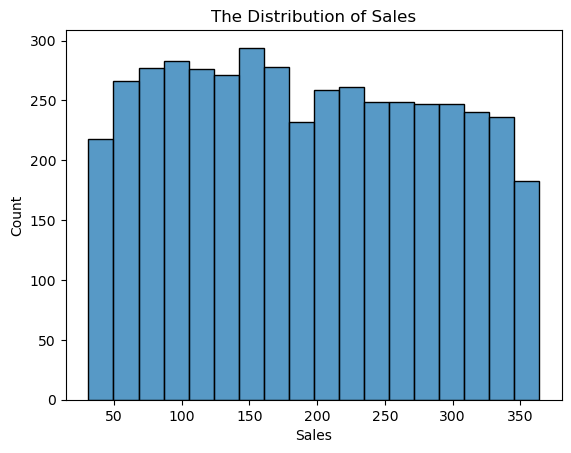

In [11]:
figure = sns.histplot(data['Sales'])
figure.set_title("The Distribution of Sales")

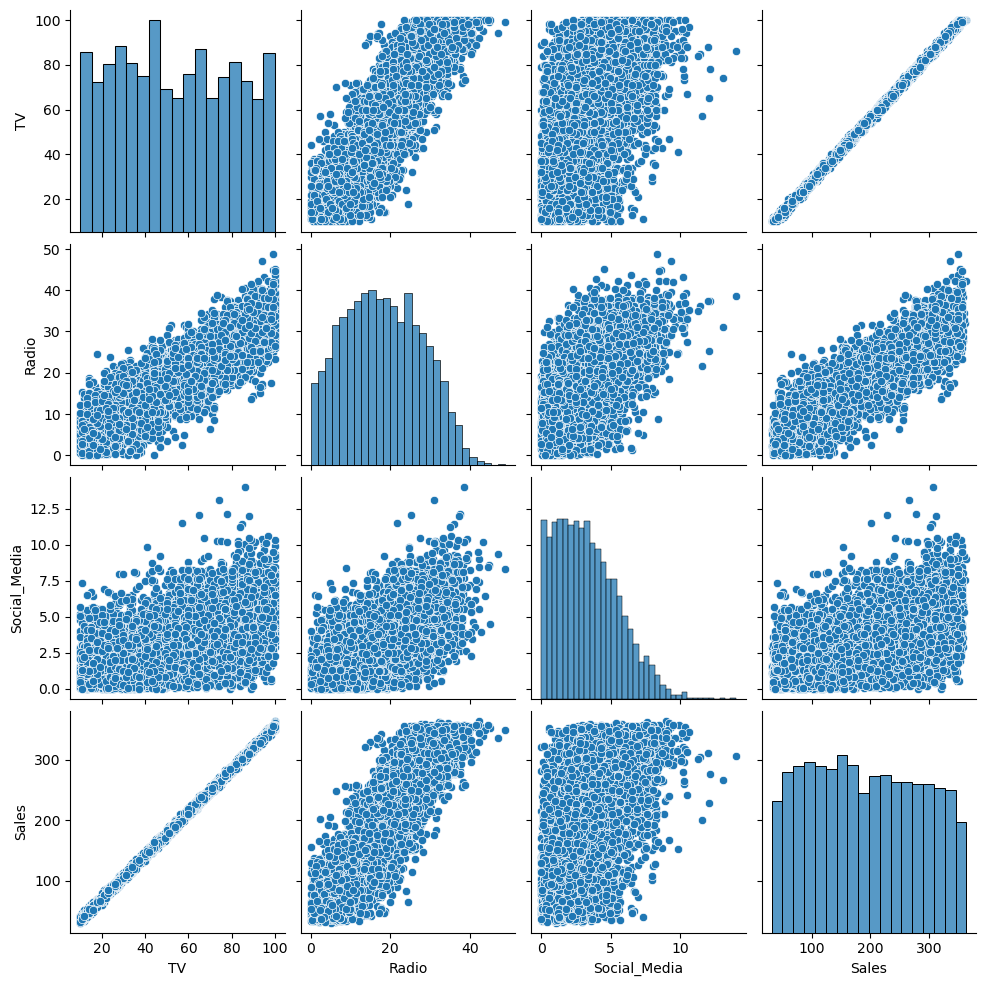

In [12]:
sns.pairplot(data)

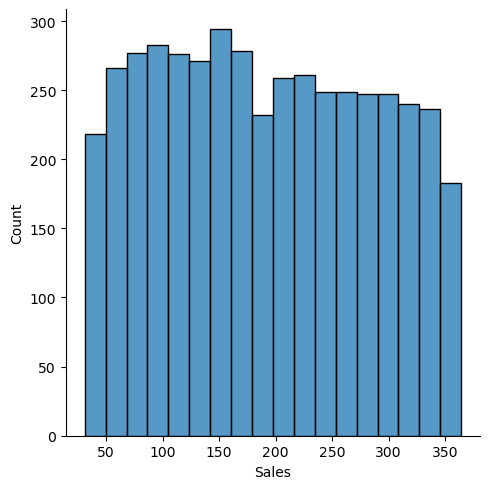

In [13]:
sns.displot(data['Sales'])

In [16]:
# Construct Model
ols_data = data[['TV', 'Sales']]
ols_formula = 'Sales ~ TV'
# apply Oridinary least square method
OLS = ols(formula = ols_formula, data = ols_data)
model = OLS.fit()

In [17]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 4.527e+06
Date:                Thu, 18 May 2023   Prob (F-statistic):               0.00
Time:                        12:31:47   Log-Likelihood:                -11393.
No. Observations:                4556   AIC:                         2.279e+04
Df Residuals:                    4554   BIC:                         2.280e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.1263      0.101     -1.257      0.209      -0.323       0.071
TV             3.5614      0.002   2127.776      0.000       3.558       3.565
==============================================================================
Omnibus:                        0.051   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.975   Jarque-Bera (JB):                0.030
Skew:                           0.001   Prob(JB):                        0.985
Kurtosis:                       3.012   Cond. No.                         138.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<AxesSubplot:xlabel='TV', ylabel='Sales'>

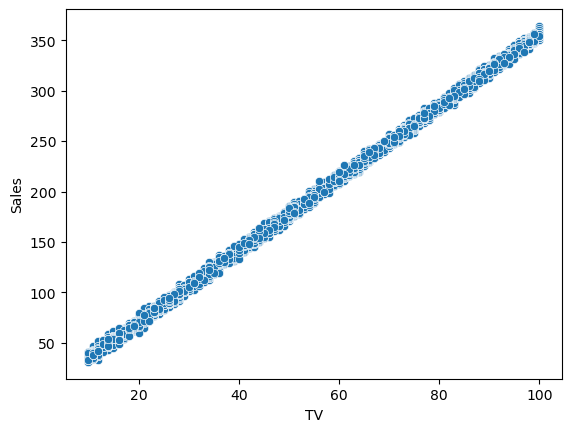

In [31]:
sns.scatterplot(x = 'TV', y= 'Sales', data = ols_data)

<AxesSubplot:xlabel='TV', ylabel='Sales'>

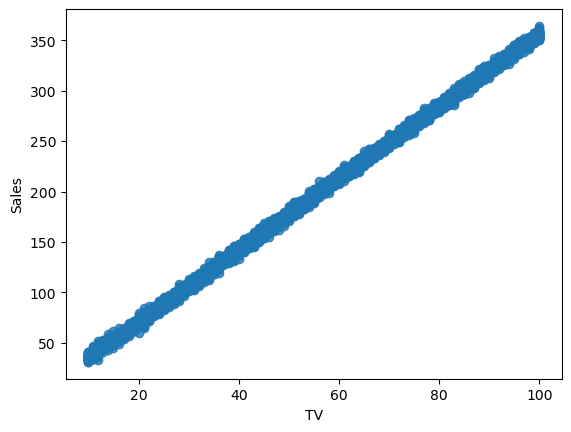

In [18]:
sns.regplot(x = 'TV', y = 'Sales', data = ols_data)

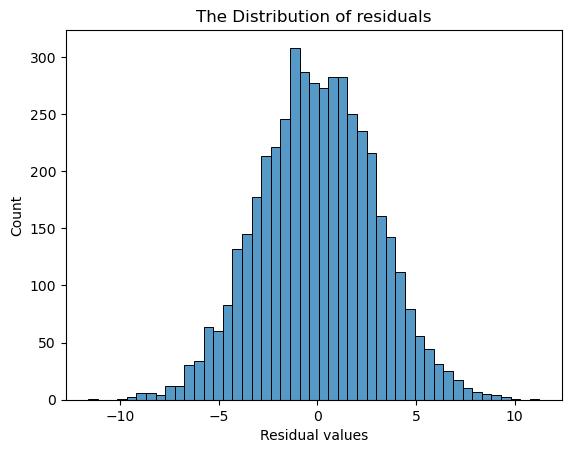

In [24]:
#check the normality Assumptions
fig = sns.histplot(residuals)
fig.set_title("The Distribution of residuals")
fig.set_xlabel("Residual values")
plt.show()

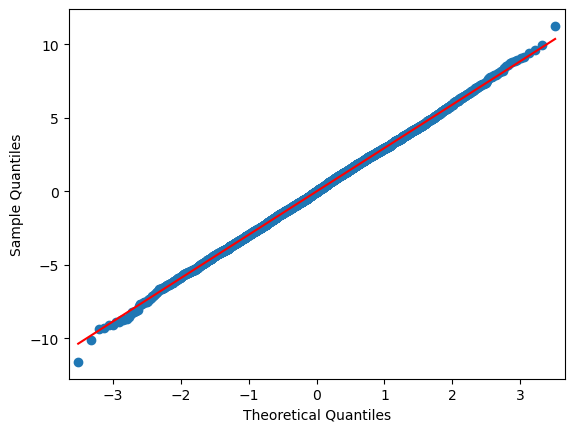

In [25]:
fig = sm.qqplot(model.resid, line= 's')
plt.show()

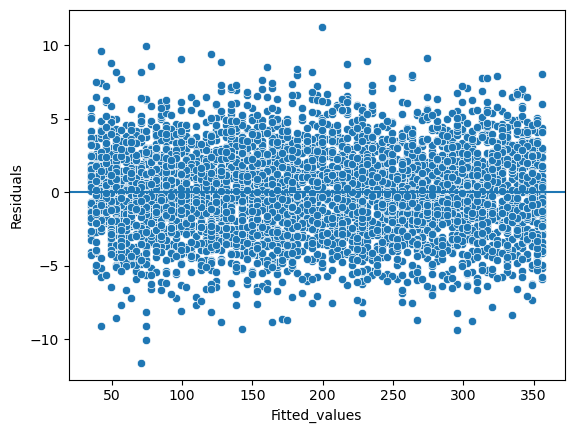

In [32]:
# Check the homoscedasity assumption
fig = sns.scatterplot(x = model.fittedvalues, y= model.resid )
fig.axhline(0)
fig.set_xlabel("Fitted_values")
fig.set_ylabel("Residuals")
plt.show()